In [9]:
import pandas as pd
import numpy as n
import pickle
import os
import sys
from pathlib import Path


root = Path(__file__).resolve().parent if "__file__" in globals() else Path.cwd()
while root.parent != root:
    if ((root / ".git").exists() and 
        (root / "README.txt").exists() and 
        (root / "results.ipynb").exists()): break
    root = root.parent
if str(root) not in sys.path: sys.path.insert(0, str(root))
from src.utils.paths import STORED_DATAPREP_PKL_PATH

data_path = root / STORED_DATAPREP_PKL_PATH
with open(os.path.normpath(data_path), "rb") as f:
    data = pickle.load(f)

dataA = data['dataA']
dataC = data['dataC']
dataA_startID = data['dataA_startID']
dataA_endID = data['dataA_endID']
dataC_lastGoodID = data['dataC_lastGoodID']



# How to use, load and save plots 

In the new folder _gui there are (for now) 3 files: gui.py, plots_gui.py and plots_gui.pkl

1. gui.py - here is all the layout for a fancy GUI interface for fast and comfortable plot visualisatiopn 
2. plot_gui.py - here is a class that allows to easy "build" plots from an existing template. Its also necessary to have this class so all plots are manipulated in the same way(displayed, load and saved). Can be improved in any moment to better track plots(eg: make an attribute "categories")
3. plots_gui.pkl - containt all loaded plots. The save function of PlotsGUI has a anti-duplicate test, but it tests only titles. This allows us to make sure that plots are unique, but also allows us to easely download a plot list, update it and save it back.


In [10]:
from plots_gui import PlotGUI, ScatterPlotGUI

## Creating a plot

Since each plot is made of a main class PlotGUI. The second is neccessary and mandatory to define since the type of plot may vary(eg: Scattered or Hystogram). 

Here is an example of a type definition: 

```python

class HistPlotGUI(PlotGUI):
    def define_plot(self, ax: plt.Axes) -> plt.Axes:
        ax.hist(data['dataA'][0]["mean"], bins=30, color='skyblue', edgecolor='black')
        return ax
````



In [11]:

x_data = [len(df) for df in dataA]                        # X – number of captions per contest
y_data = [df["votes"].sum() for df in dataA]              # Y – total votes per contest

plot1 = ScatterPlotGUI(title="Contest Size vs. Total Votes", 
            xlabel="Number of Captions per Contest", 
            ylabel="Total Votes per Contest",  dataX=x_data, dataY=y_data)


plot2 = ScatterPlotGUI(title="LALALA", 
            xlabel="Number of Captions per Contest", 
            ylabel="Total Votes per Contest",
            description="This scatter plot visualizes the relationship between the number of captions submitted in each contest and the total number of votes received. Each point represents a contest, with the x-coordinate indicating the number of captions and the y-coordinate indicating the total votes. This plot helps to identify trends and correlations between contest participation and voter engagement.",
            dataX=x_data, dataY=y_data)



## Display a plot 

/Users/43rt1k/Documents/EPFL/_MASTER/ADA/ADAcore42/src/models/gui/plots_gui.py:117: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


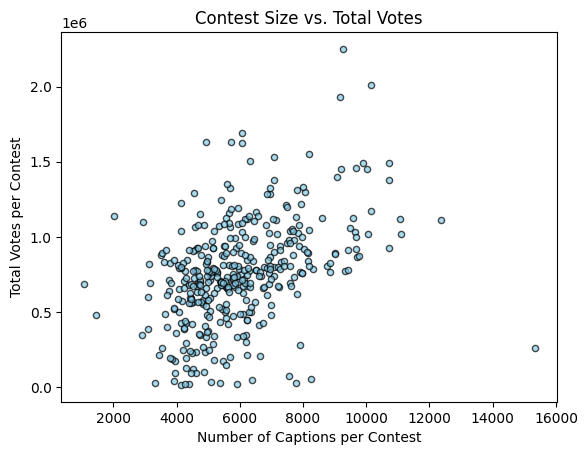

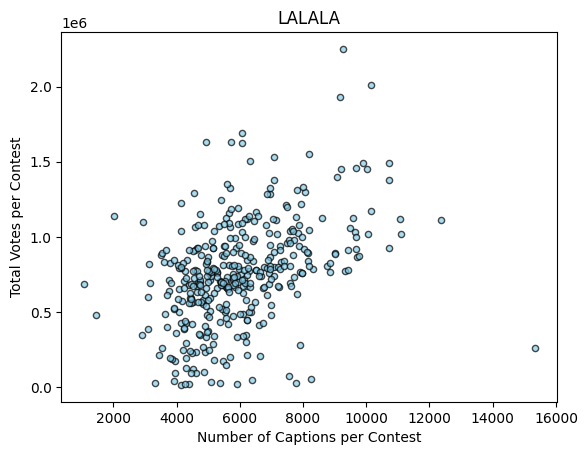

In [12]:
plot1.show()
plot2.show()

## Store plots

In [13]:
plots = [plot1, plot2] # list of plots to save

PlotGUI.save_plots(plots)


💾 Saved 2 total plots to /Users/43rt1k/Documents/EPFL/_MASTER/ADA/ADAcore42/src/models/gui/plots_gui.pkl
✅ Added 2 new plots.


No redundant plot added

In [14]:
import copy
plots.append(copy.copy(plot1))

PlotGUI.save_plots(plots)

💾 Saved 2 total plots to /Users/43rt1k/Documents/EPFL/_MASTER/ADA/ADAcore42/src/models/gui/plots_gui.pkl
ℹ️ No new plots were added (all already present).


### Load plots

In [15]:
plots = PlotGUI.load_plots()

✅ Loaded 2 plots from /Users/43rt1k/Documents/EPFL/_MASTER/ADA/ADAcore42/src/models/gui/plots_gui.pkl


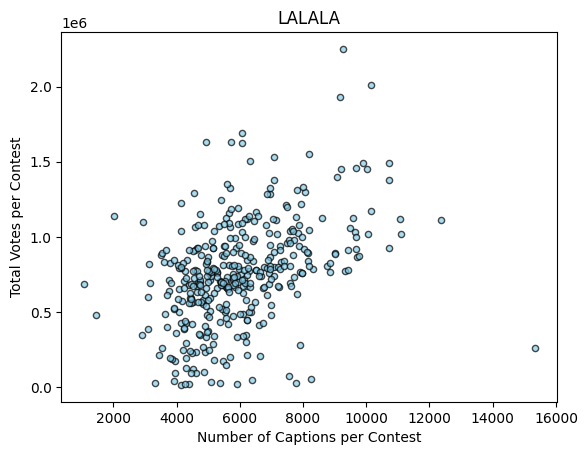

In [16]:
plots[1].show()
plots

# How to use the fancy graph GUI